In [1]:
#import needed python modules and classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
!pip install seaborn -q
import seaborn as sns
#!pip install colorama
from colorama import Fore

#### Question 1: Get and Review Data

In [2]:
#get data
datBank = pd.read_csv('BankSet.csv')
datBank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,purchase
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,no


#### Question 2: Loan Balance and Campaign Contacts

In [3]:
#get and display values
md('**The mean loan balance** per customer is $\${:,}$.  \n'.format(round(datBank.balance.mean(),2))\
+ '**The average number of contacts** made to a customer during a campaign is ${}$.'.format(round(datBank.campaign.mean(),2)))

**The mean loan balance** per customer is $\$1,422.66$.  
**The average number of contacts** made to a customer during a campaign is $2.79$.

#### Question 3: Distribution of Loan Balance

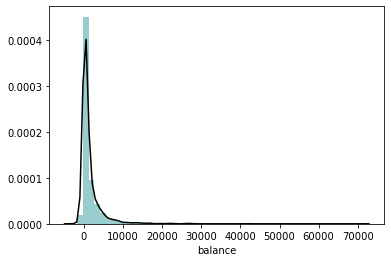

In [4]:
#create plot
sns.distplot(datBank['balance'], kde_kws={'color':'k'}, color='teal')

The distribution of loan balance is **right skewed**. Most people have no loan balance, but there are a few with negative loan balance and some with a high balance to the right.

#### Question 4: Distribution of Customer Age

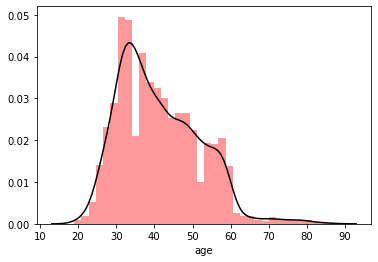

In [5]:
#create plot
sns.distplot(datBank['age'], kde_kws={'color':'k'}, color='red')

The distribution for age is **also slightly right skewed** with a high at age 30 and some dips in what looks like ages 35 and 50. It is less skewed compared to the loan balance metrics.

#### Question 5: Adding Purchase Code

In [6]:
#add the field for purchase code(1=current campaign purchase, 0=no purchase)
purch_code = pd.get_dummies(datBank['purchase'], prefix='purchase', drop_first=True)
#add to main dataset
datBank = pd.concat([datBank, purch_code], axis=1)
#change the column name
datBank.rename(columns={'purchase_yes': 'purchase_code'}, inplace=True)
#drop recoded category purchase
datBank = datBank.drop(['purchase'], axis=1)

In [7]:
#verify mean is correct
mean_val = (datBank.purchase_code.mean()*100).round(2)
md('${}$% of the customers purchased the term deposit product.'.format(mean_val))

$11.52$% of the customers purchased the term deposit product.

In [8]:
#View updated data set (for next question)
datBank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,purchase_code
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,0


#### Question 6: Correlation Table for Numerical Features

In [9]:
#group numerical features
num_features = ['age', 'balance', 'campaign', 'pdays', 'previous', 'purchase_code']
#create correlation table
datBank[num_features].corr()

,age,balance,campaign,pdays,previous,purchase_code
age,1.000000,0.083820,-0.005148,-0.008894,-0.003511,0.045092
balance,0.083820,1.000000,-0.009976,0.009437,0.026196,0.017905
campaign,-0.005148,-0.009976,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,0.009437,-0.093137,1.000000,0.577562,0.104087
previous,-0.003511,0.026196,-0.067833,0.577562,1.000000,0.116714
purchase_code,0.045092,0.017905,-0.061147,0.104087,0.116714,1.000000


- **The numeric variable most correlated** with the whether a purchase was made in the current campaign is **previous**. This is the total number of contacts made with the customer before the current campaign began.
- **The variable least correlated** with *purchase_code* is the customer's **loan balance**.
- **Knowing these relationships is important** in helping us identify what variables will be most and least valuable to include and pay attention to when building our model and training data.

#### Question 7: Category Aggregates for Purchase_code

In [10]:
#define categories to aggregate
cat_features = ['job', 'marital', 'education', 'housing', 'loan', 'poutcome']
#aggregate features by purchase_code (sum-> of purchase, count-> in data)
from scipy import stats
for x in cat_features: 
    print(datBank.groupby(x)['purchase_code'].agg([np.sum, 'count']), '\n')

               sum  count
job                      
admin.          58    478
blue-collar     69    946
entrepreneur    15    168
housemaid       14    112
management     131    969
retired         54    230
self-employed   20    183
services        38    417
student         19     84
technician      83    768
unemployed      13    128
unknown          7     38 

            sum  count
marital               
divorced   77.0    528
married   277.0   2797
single    167.0   1196 

           sum  count
education            
primary     64    678
secondary  245   2306
tertiary   193   1350
unknown     19    187 

           sum  count
housing              
no       301.0   1962
yes      220.0   2559 

        sum  count
loan              
no    478.0   3830
yes    43.0    691 

            sum  count
poutcome              
failure    63.0    490
other      38.0    197
success    83.0    129
unknown   337.0   3705 



##### Explanatory Power the Categorical Features:
- **poutcome:** the outcome of the previous campaign seems to have a lot of explanatory power for whether or not a customer will make a purchase in the current campaign. The proportion of unknown outcomes seems to be high for current purchases from looking at the total purchases relative to the total unknown outcomes in the dataset.
- **loan:** whether the customer has a personal loan also seems to say a lot about whether they make a purchase. More of those who don't have loans seem to make purchases
- **education:** Although slightly less apparent than the others, level of education seems to affect the purchase decision with a positive outcome favoring secondary and tertiary education levels.

#### Question 8: Explanatory Power of One Category
From above, since **outcome of the previous campaign** seems to be a strong predictor, this is the one that will be transformed.

In [11]:
#one-hot encode variable
outcome = pd.get_dummies(datBank['poutcome'], prefix='outcome', drop_first=True)
#add to the main dataset (dropped column indicated failure)
datBank = pd.concat([datBank, outcome], axis=1)
#drop the now recoded variable for poutcome
datBank = datBank.drop(['poutcome'], axis=1)

In [12]:
#view updated dataset
datBank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,purchase_code,outcome_other,outcome_success,outcome_unknown
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,0,0,0,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,0,0,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,0,0,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,0,0,0,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,0,0,0,1


#### Question 9: Construct Predictor Dataset

In [13]:
#get list of numerical variables variables 
x_list = num_features
#add new binary variables and remove purchase_code
x_list.extend(['outcome_other', 'outcome_success', 'outcome_unknown'])
x_list.remove('purchase_code')
#construct dataset for predictors
X = datBank[x_list]
X.head() #view predictors

,age,balance,campaign,pdays,previous,outcome_other,outcome_success,outcome_unknown
0,30,1787,1,-1,0,0,0,1
1,33,4789,1,339,4,0,0,0
2,35,1350,1,330,1,0,0,0
3,30,1476,4,-1,0,0,0,1
4,59,0,1,-1,0,0,0,1


#### Question 10: Construct Dependent Variable Dataset

In [14]:
#purchase_code is variable of interest
Y = pd.DataFrame(datBank['purchase_code'])
Y.head()

,purchase_code
0,0
1,0
2,0
3,0
4,0


#### Question 11: Split Data for Training and Testing

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=500)

#### Question 12: Model Generation and Evaluation 
##### Apply a decision tree classifier to the training to create a model.

In [16]:
from sklearn.tree import DecisionTreeClassifier
#create decision tree classifier instance
class_tree = DecisionTreeClassifier(max_depth=3)
#fit model using training data
class_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

##### Calculate the accuracy of the model as a whole

In [17]:
#predict y values from model
ytr_hat = class_tree.predict(x_train)
#calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_train, y_pred=ytr_hat)
md('This model\'s accuracy score is **${}$**.'.format(accuracy.round(5)))

This model's accuracy score is **$0.89454$**.

##### Confusion Matrix

In [18]:
#create and display a contigency table
tr_conf_matrix = pd.crosstab(y_train['purchase_code'], ytr_hat, rownames=['True Y'], colnames=['Pred Y >>'], margins=True)
tr_conf_matrix

Pred Y >>,0,1,All
True Y,,,
0,2369,30,2399
1,256,57,313
All,2625,87,2712


##### Calculating Precision, Recall, and F-Measure for both yes and no purchase outcomes

In [19]:
#define model to calculate measures
def model_measures(conf_matrix):
    #Precision for both purchase codes = xx/classfied(x)
    prec_no = conf_matrix.iloc[0,0]/conf_matrix.iloc[2,0]
    prec_yes = conf_matrix.iloc[1,1]/conf_matrix.iloc[2,1]

    #Recall for both purchase codes = xx/actual(x)
    recall_no = conf_matrix.iloc[0,0]/conf_matrix.iloc[0,2]
    recall_yes = conf_matrix.iloc[1,1]/conf_matrix.iloc[1,2]

    #F-Measure for both purchase codes = (2*p*r)/(p+r)
    fno = (2* prec_no * recall_no)/(prec_no + recall_no)
    fyes = (2* prec_yes * recall_yes)/(prec_yes + recall_yes)
    result = ''
    #Get results
    values = '**Precision:** purchase = ${}$, no purchase = ${}$  \n'.format(prec_yes.round(5), prec_no.round(5))+\
      '**Recall:** purchase = ${}$, no purchase = ${}$  \n'.format(recall_yes.round(5), recall_no.round(5)) +\
      '**F-Measure:** purchase = ${}$, no purchase = ${}$'.format(fyes.round(5), fno.round(5))
    return values

#show values for training data predictions
md(model_measures(tr_conf_matrix))

**Precision:** purchase = $0.65517$, no purchase = $0.90248$  
**Recall:** purchase = $0.18211$, no purchase = $0.98749$  
**F-Measure:** purchase = $0.285$, no purchase = $0.94307$

Based on the recall value (true positive rate) for predicting when a purchase occurs ($r=0.18211$), this model does not seem like a good one for predicting campaign purchasers.

##### Evaluate Primary Predictor 

In [20]:
#get and display features' importances
pd.Series(data=class_tree.feature_importances_, index=x_train.columns).sort_values()

previous           0.000000
outcome_other      0.000000
outcome_unknown    0.000000
campaign           0.027488
balance            0.060732
pdays              0.101871
age                0.113765
outcome_success    0.696143
dtype: float64

The primary predictor of a campaign purchaser is if the previous marketing campaign was successful ***(poutcome = success)***. Using this predictor exclusively might be problematic because there are other aspects about the customer that weigh on their decision to make a campaign purchase e.g. age, the frequency of contacts metrics (pdays, campaign, month). Excluding them will possibly provide less accurate prediction for a customer's future decision.


#### Question 13: Validation Partition for Model Predictions

In [21]:
#Install needed conda and python packages
import sys
!pip install graphviz
!pip install pydotplus
#!conda install --yes --prefix {sys.prefix} graphviz
#!conda install --yes --prefix {sys.prefix} pydotplus
!pip install six

#Import needed classes
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


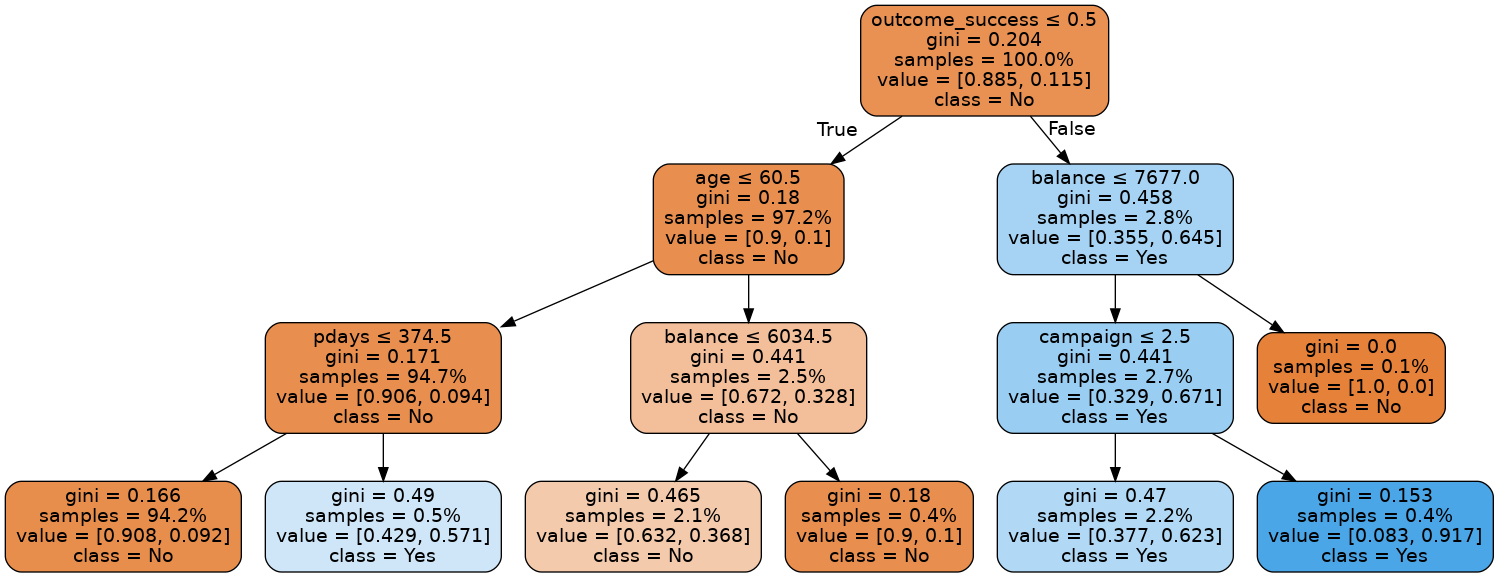

In [22]:
#Output reading object instance
dot_data = StringIO()
#graphic exporting instance for decision tree
export_graphviz(decision_tree = class_tree,
               out_file=dot_data,
               filled=True, rounded=True, proportion=True,
               feature_names=x_train.columns,
               class_names=['No', 'Yes'],
               special_characters=True)
#create graph from output object
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#create and display image from graph
Image(graph.create_png())

##### Using Test Data for Predictions

In [23]:
#create model
ytest_hat = class_tree.predict(x_test)

#create confusion matrix to check predictions
tconf_matrix = pd.crosstab(y_test['purchase_code'], ytest_hat, rownames=['True Y'], colnames=['Pred Y >>'], margins=True)
tconf_matrix

Pred Y >>,0,1,All
True Y,,,
0,1576,25,1601
1,171,37,208
All,1747,62,1809


In [24]:
#Display model measures
md(model_measures(tconf_matrix))

**Precision:** purchase = $0.59677$, no purchase = $0.90212$  
**Recall:** purchase = $0.17788$, no purchase = $0.98438$  
**F-Measure:** purchase = $0.27407$, no purchase = $0.94146$

In [25]:
#Check for fit issues
#get accuracy of test data model
test_accuracy = accuracy_score(y_true=y_test,y_pred=ytest_hat)
print('Test Data Accuracy Score: ', '\033[1m', test_accuracy.round(5),\
      '\n\033[0mTraining Data Accuracy Score: ', '\033[1m', accuracy.round(5))

Test Data Accuracy Score:   0.89165 
Training Data Accuracy Score:   0.89454


- From above, the accuracy score of the training data is slightly higher than that of the test data indicating that there is ***very little instance of overfitting*** in our model.
- Looking at the measures, there is ***slightly less*** precision, recall, and purchase when it comes to predicting campaigner purchase compared to the training data.